A notebook for guiding image capture and reflectance and stereo calibration with the OROCHI laboratory simulator.

Experiments performed on 26/04/2023

- Reflectance Calibration
- Geometric Calibration
- Sample 1
- Sample 2
- Sample 3
- Sample 4

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Overview

The steps are as follows. Note that dark image capture is reserved for the end, to minimise physical interactions with the cameras.

1. Reflectace Calibration Target Imaging
    - Prompt: Lens Cap removal, put calibration target in place
    - Cycle over cameras. For each camera:
        - Test the connection
        - load/configure the camera
        - get optimal exposure and check ROI
        - capture repeat images of the calibration target
        - save the images
        - save the exposures used
2. Geometric Calibration Target Imaging
    - Prompt: Lens Cap removal, put geometric calibration target in place
    - Cycle over cameras. For each camera:
        - Test the connection
        - load/configure the camera
        - get optimal exposure and check ROI
        - capture repeat images of the geometric calibration target
        - save the images
        - save the exposures used
3. Sample Imaging
    - as above, but with the sample replacing the calibration target
    - repeat for each of 4 different samples
4. Dark Imaging
    - Prompt: Lens cap on / lights out
    - Cycle over cameras. For each camera:
        - check connection
            - Calibration darks:
                - load calibration exposure for given camera
                - set exposure
                - capture repeat frames
                - save frames
            - Sample darks:
                - as aove but load sample exposures instead
5. Processing to Reflectance

# Setup

Here we setup the IC object, load the camera configuration file, and connect to and initiate the OROCHI camera channels.

In [2]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
camera_config = osc.load_camera_config()
cameras = osc.connect_cameras(ic, camera_config)
osc.configure_cameras(cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
Color Format set to : "Y800 (1920x1200)"
Frame Rate set to : 30.0 FPS
Brightness Value set to 416
Contrast Value set to 0
Sharpness Value set to 0
Gamma Value set to 100
Gain Value set to 0.0
Gain Auto set to 0
Exposure Value set to 0.009999999776482582
Exposure Auto set to 1
Exposure Auto Reference set to 80
Exposure Auto Max Value set to 10.0
Exposure Auto Max Auto set to 0
Trigger Enable set to 0
Denoise Value set to 0
Flip Horizontal Enable set to 0
Flip Vertical Enable set to 0
Highlight Reduction Ena

## Set ROIs

x: 541
y: 627


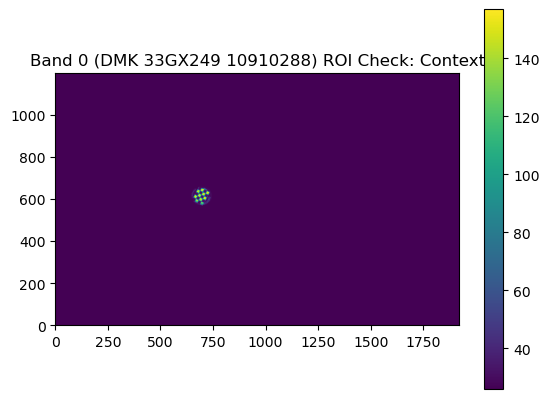

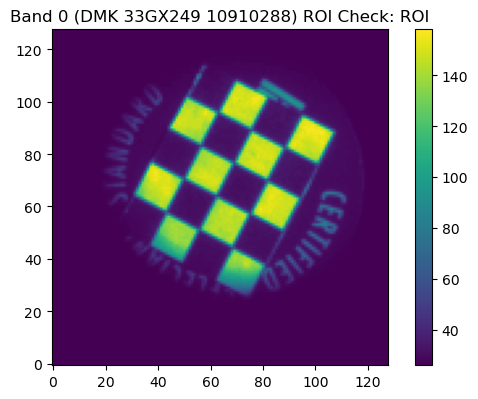

x: 234
y: 893


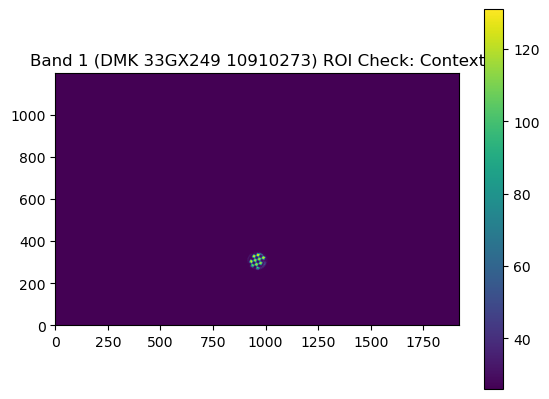

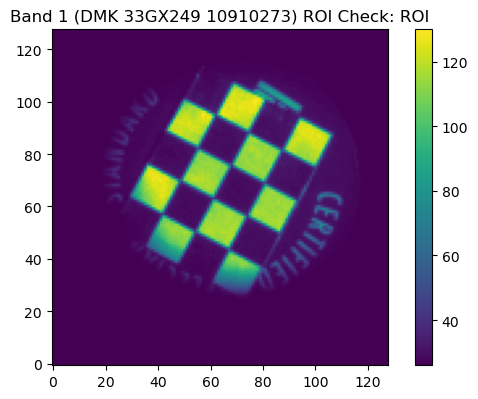

x: 232
y: 617


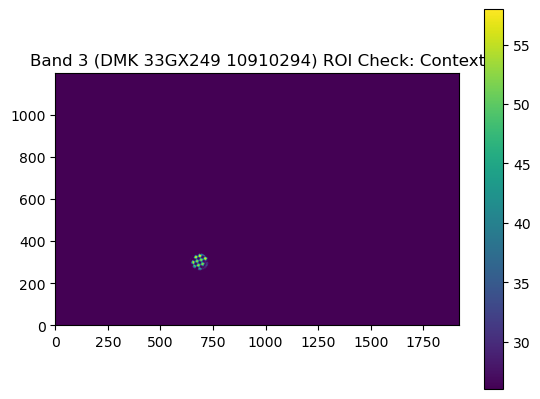

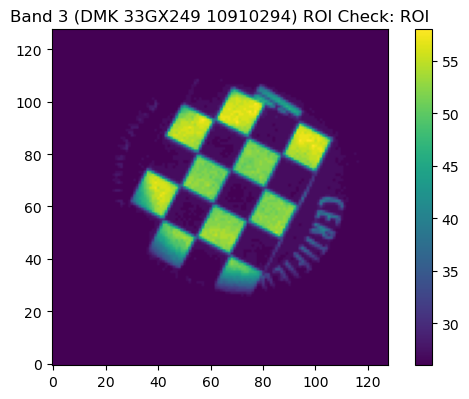

x: 530
y: 1183


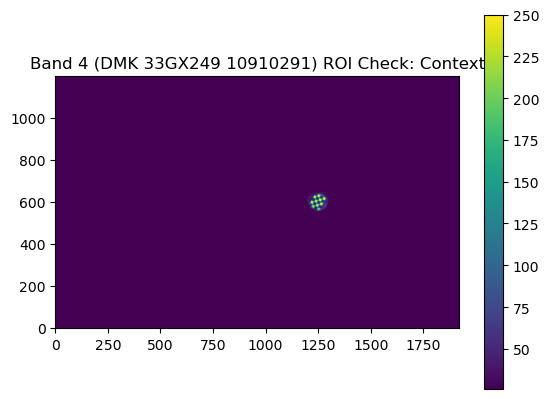

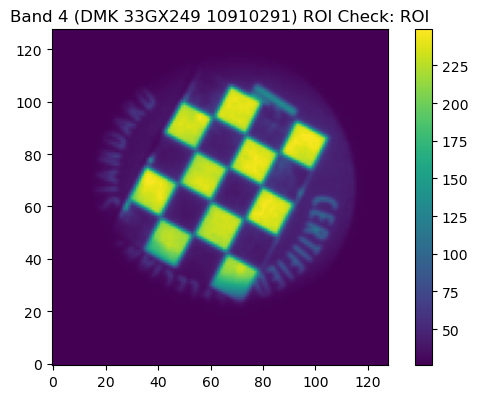

x: 867
y: 637


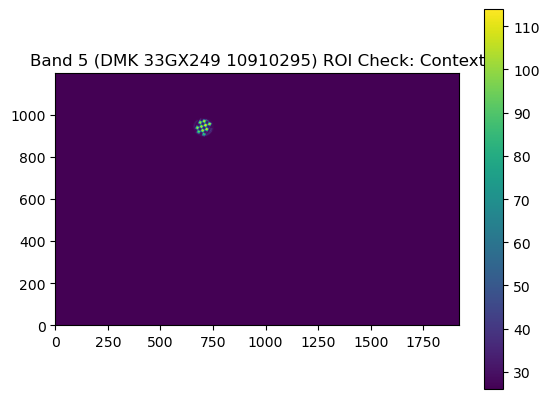

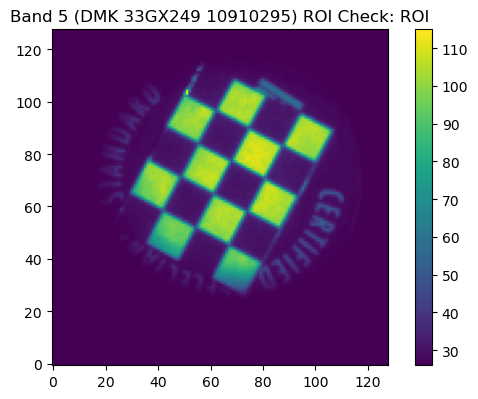

x: 870
y: 907


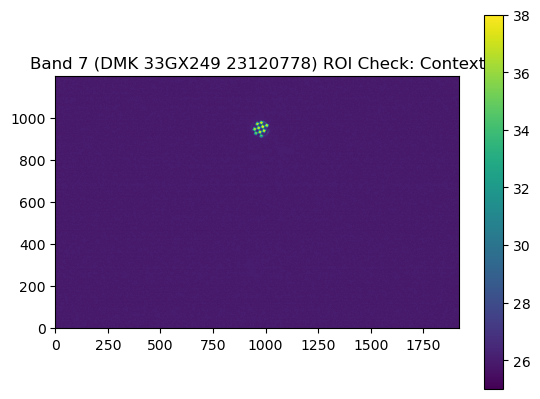

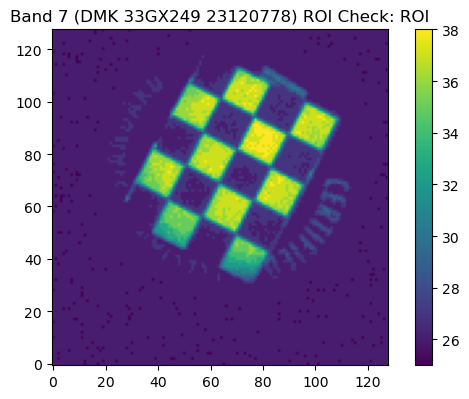

x: 242
y: 1187


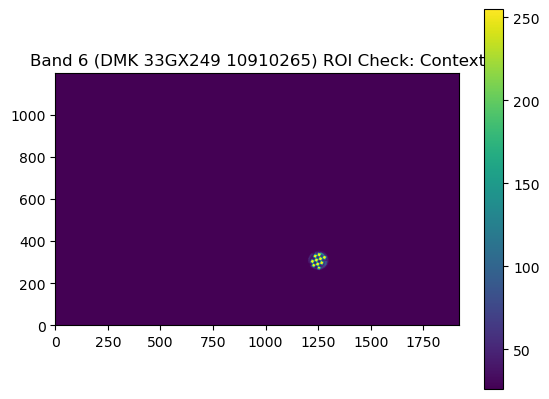

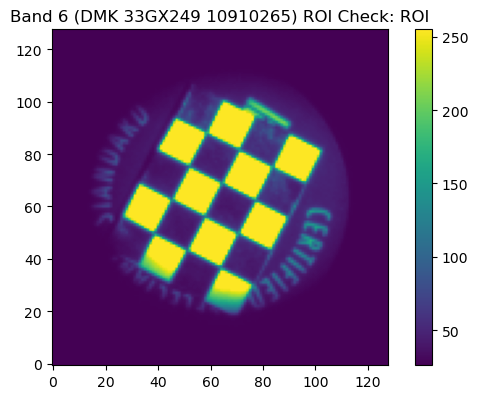

In [3]:
osc.find_camera_rois(cameras, roi_size=128)

# Calibration Target Imaging

- Prompt: Lens Cap removal, put calibration target in place
- Cycle over cameras. For each camera:
    - get optimal exposure and check ROI
    - capture repeat images of the calibration target
    - save the images
    - save the exposures used

Check:
1. The calibration target is in place
2. Lens cap is removed

In [4]:
osc.prepare_reflectance_calibration(ic)

Find the optimal exposures for calibration target imaging.

In [9]:
calibration_exposures = osc.find_channel_exposures(cameras)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Quantile: 62.0, Target: 150
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.004838709719479084
Exposure set to 0.004838000051677227 (err of 7.098555685055782e-07
Trial 1:
Quantile: 114.0, Target: 150
Exposure current Value: 0.004838000051677227
Exposure Value set to 0.006365789566189051
Exposure set to 0.006364999804645777 (err of 7.897370347858049e-07
Trial 2:
Quantile: 142.0, Target: 150
Exposure current Value: 0.006364999804645777
Exposure Value set to 0.00672359112650156
Exposure set to 0.006723000202327967 (err of 5.911406077124121e-07
Trial 3:
Quantile: 148.0, Target: 150
Exposure current Value: 0.006723000202327967
Exposure Value set to 0.006813851650804281
Exposure set to 0.006812999956309795 (err of 8.51600103685124e-07
Trial 4:
Quantile: 150.0, Target: 150
Success after 4 trials
Ex

Check the calibration target images.

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.006812999956309795
Exposure Auto set to 0


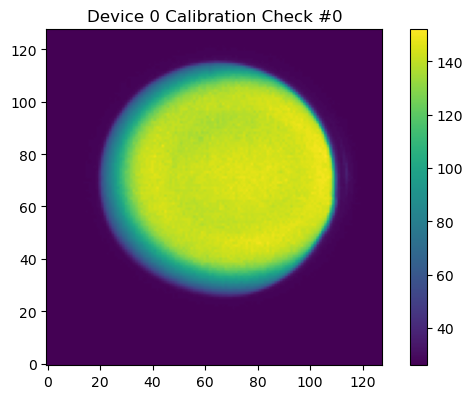

-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Exposure Value set to 0.009384999983012676
Exposure Auto set to 0


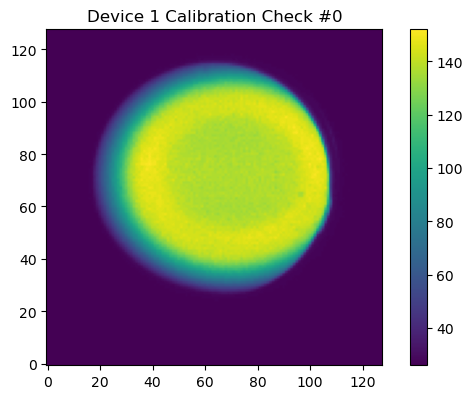

-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Exposure Value set to 0.04165700078010559
Exposure Auto set to 0


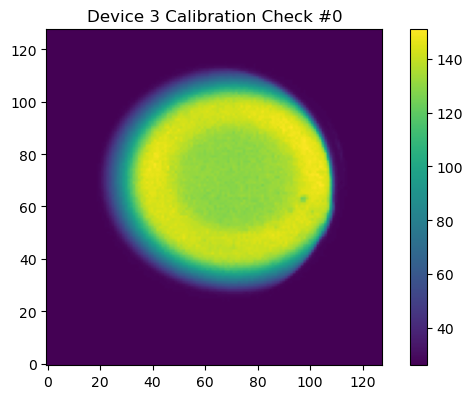

-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Exposure Value set to 0.0066019999794662
Exposure Auto set to 0


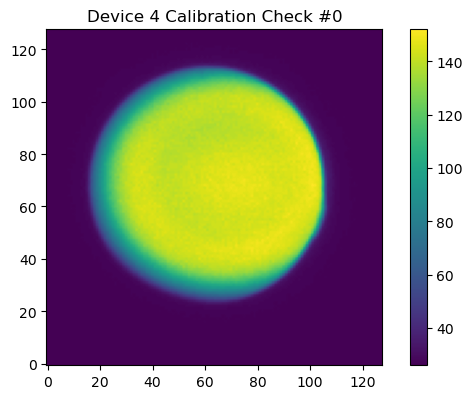

-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Exposure Value set to 0.016533000394701958
Exposure Auto set to 0


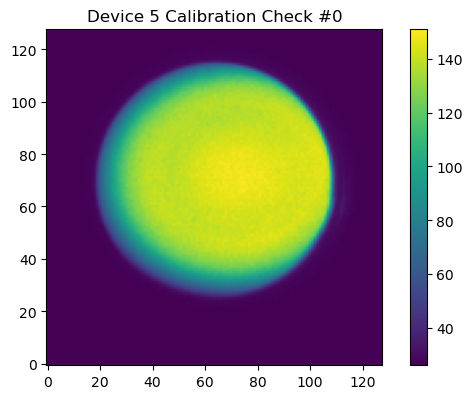

-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Exposure Value set to 0.07548300176858902
Exposure Auto set to 0


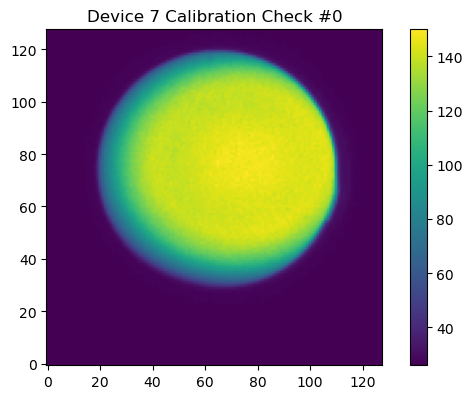

-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Exposure Value set to 0.002940000034868717
Exposure Auto set to 0


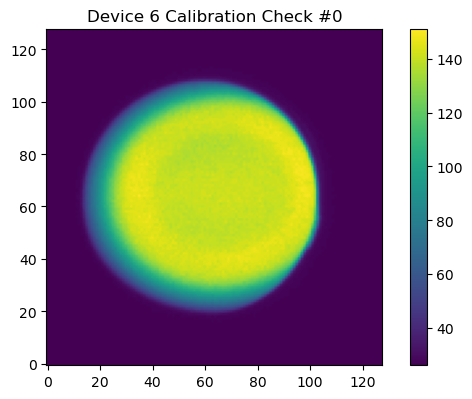

-----------------------------------


In [10]:
osc.capture_channel_images(
    cameras, 
    calibration_exposures, 
    subject='Calibration Check', 
    roi=True, 
    show_img=True)

Capture 10 repeat images of the calibration target in each channel.

In [11]:
osc.capture_channel_images(
    cameras, 
    calibration_exposures, 
    subject='reflectance_calibration', 
    repeats=10,
    roi=False, 
    show_img=False,
    save_img=True)

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.006812999956309795
Exposure Auto set to 0
Exposure current Value: 0.006812000181525946
Image 0 written to ..\data\reflectance_calibration\0_650\650_0_img.tif
Exposure current Value: 0.006812000181525946
Image 1 written to ..\data\reflectance_calibration\0_650\650_1_img.tif
Exposure current Value: 0.006812000181525946
Image 2 written to ..\data\reflectance_calibration\0_650\650_2_img.tif
Exposure current Value: 0.006812000181525946
Image 3 written to ..\data\reflectance_calibration\0_650\650_3_img.tif
Exposure current Value: 0.006812000181525946
Image 4 written to ..\data\reflectance_calibration\0_650\650_4_img.tif
Exposure current Value: 0.006812000181525946
Image 5 written to ..\data\reflectance_calibration\0_650\650_5_img.tif
Exposure current Value: 0.006812000181525946
Image 6 written to ..\data\reflectance_calibration\0_650\650_6_img.tif
Exposure current Value: 0.006812000181525

Write the exposures to file.

In [12]:
osc.record_exposures(cameras, calibration_exposures, 'reflectance_calibration')

# Geometric Calibration Target Imaging

- Prompt: Lens Cap removal, put geometric calibration target in place
- Cycle over cameras. For each camera:
    - get optimal exposure and check ROI
    - capture repeat images of the geometric calibration target
    - save the images
    - save the exposures used

Check:
1. The geometric target is in place
2. Lens cap is removed

In [44]:
osc.prepare_geometric_calibration(ic)

Find the optimal exposures for geometric calibration target imaging.

In [4]:
geometric_exposures = osc.find_channel_exposures(cameras, roi=True)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Quantile: 52.0, Target: 150
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.005769230891019106
Exposure set to 0.005768999923020601 (err of 2.3112023392508896e-07
Trial 1:
Quantile: 101.0, Target: 150
Exposure current Value: 0.005768999923020601
Exposure Value set to 0.008567821234464645
Exposure set to 0.008566999807953835 (err of 8.218598985428038e-07
Trial 2:
Quantile: 138.0, Target: 150
Exposure current Value: 0.008566999807953835
Exposure Value set to 0.009311956353485584
Exposure set to 0.009310999885201454 (err of 9.564277918434894e-07
Trial 3:
Quantile: 147.0, Target: 150
Exposure current Value: 0.009310999885201454
Exposure Value set to 0.009501020424067974
Exposure set to 0.009500999934971333 (err of 2.0356050560443872e-08
Trial 4:
Quantile: 150.0, Target: 150
Success after 4 trial

Check the geometric calibration target images.

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.009500999934971333
Exposure Auto set to 0


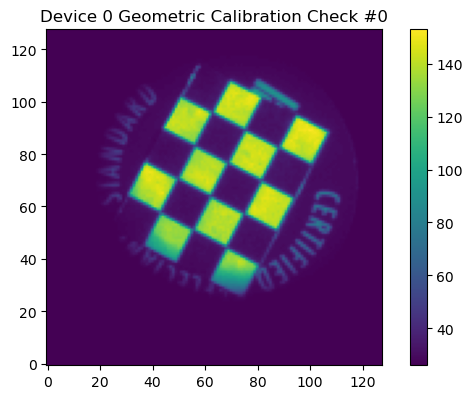

-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Exposure Value set to 0.012102999724447727
Exposure Auto set to 0


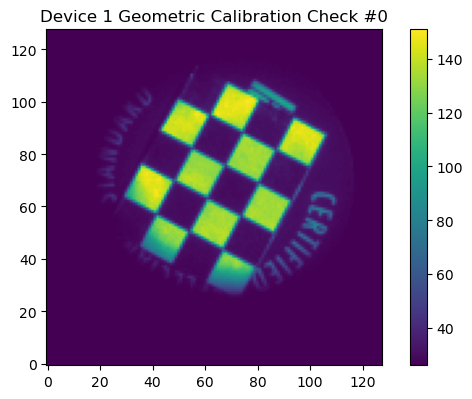

-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Exposure Value set to 0.061142999678850174
Exposure Auto set to 0


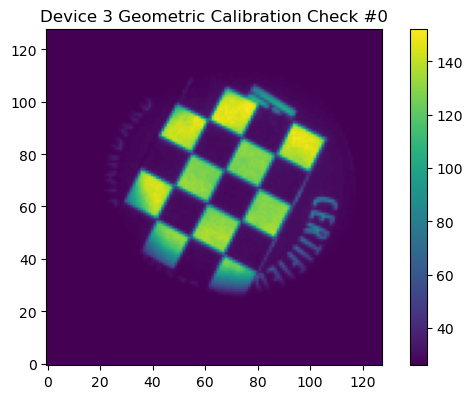

-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Exposure Value set to 0.008577999658882618
Exposure Auto set to 0


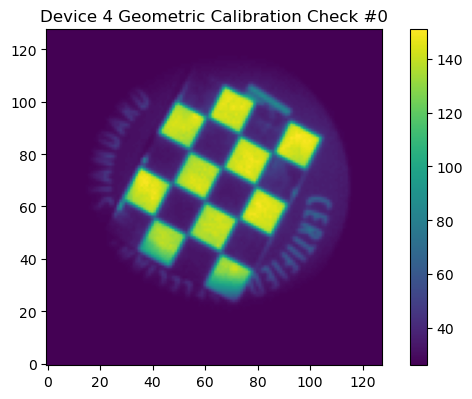

-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Exposure Value set to 0.022779999300837517
Exposure Auto set to 0


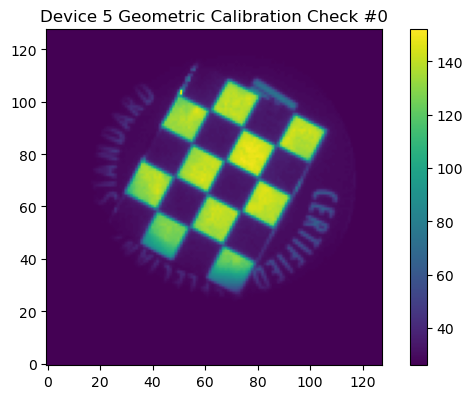

-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Exposure Value set to 0.10034000128507614
Exposure Auto set to 0


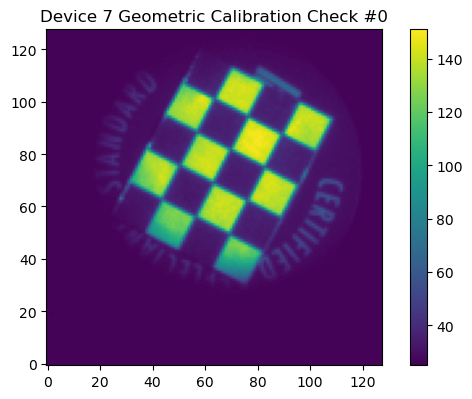

-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Exposure Value set to 0.0036440000403672457
Exposure Auto set to 0


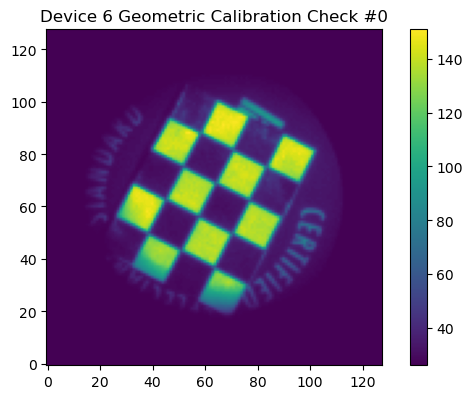

-----------------------------------


In [5]:
osc.capture_channel_images(
    cameras, 
    geometric_exposures, 
    subject='Geometric Calibration Check', 
    roi=True, 
    show_img=True)

Capture 10 repeat images of the geometric calibration target in each channel.

In [6]:
osc.capture_channel_images(
    cameras, 
    geometric_exposures, 
    subject='geometric_calibration', 
    repeats=10,
    roi=False, 
    show_img=False,
    save_img=True)

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.009500999934971333
Exposure Auto set to 0
Exposure current Value: 0.009499999694526196
Image 0 written to ..\data\geometric_calibration\0_650\650_0_img.tif
Exposure current Value: 0.009499999694526196
Image 1 written to ..\data\geometric_calibration\0_650\650_1_img.tif
Exposure current Value: 0.009499999694526196
Image 2 written to ..\data\geometric_calibration\0_650\650_2_img.tif
Exposure current Value: 0.009499999694526196
Image 3 written to ..\data\geometric_calibration\0_650\650_3_img.tif
Exposure current Value: 0.009499999694526196
Image 4 written to ..\data\geometric_calibration\0_650\650_4_img.tif
Exposure current Value: 0.009499999694526196
Image 5 written to ..\data\geometric_calibration\0_650\650_5_img.tif
Exposure current Value: 0.009499999694526196
Image 6 written to ..\data\geometric_calibration\0_650\650_6_img.tif
Exposure current Value: 0.009499999694526196
Image 7 wr

Write the exposures to file.

In [8]:
osc.record_exposures(cameras, geometric_exposures, 'geometric_calibration')

# Sample Imaging

- Prompt: Lens Cap removal, put sample in place
- Cycle over cameras. For each camera:
    - get optimal exposure and check ROI
    - capture repeat images of the sample
    - save the images
    - save the exposures used

Check:
1. The sample is in place
2. Lens cap is removed

In [ ]:
osc.prepare_sample_imaging(ic)

Find the optimal exposures for sample imaging.

In [13]:
sample_exposures = osc.find_channel_exposures(cameras, roi=True, n_hot=1, limit=10)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Quantile: 30.0, Target: 150
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.010000000707805157
Exposure set to 0.009999999776482582 (err of 6.984919309616089e-10
Trial 1:
Quantile: 47.0, Target: 150
Exposure current Value: 0.009999999776482582
Exposure Value set to 0.03191489353775978
Exposure set to 0.03191399946808815 (err of 8.934355796644255e-07
Trial 2:
Quantile: 95.0, Target: 150
Exposure current Value: 0.03191399946808815
Exposure Value set to 0.05039052665233612
Exposure set to 0.05039000138640404 (err of 5.240895246186317e-07
Trial 3:
Quantile: 133.0, Target: 150
Exposure current Value: 0.05039000138640404
Exposure Value set to 0.05683082714676857
Exposure set to 0.05683000013232231 (err of 8.284989604367965e-07
Trial 4:
Quantile: 148.0, Target: 150
Exposure current Value: 0.0568300

Check the sample images.

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.057597000151872635
Exposure Auto set to 0


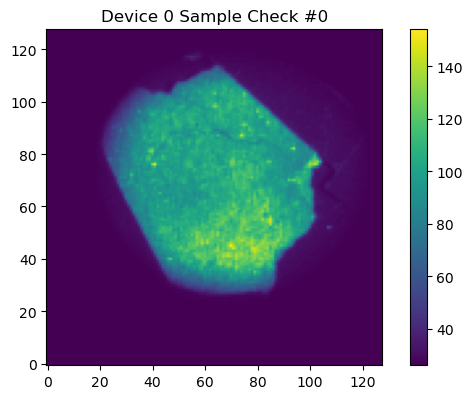

-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Exposure Value set to 0.059397999197244644
Exposure Auto set to 0


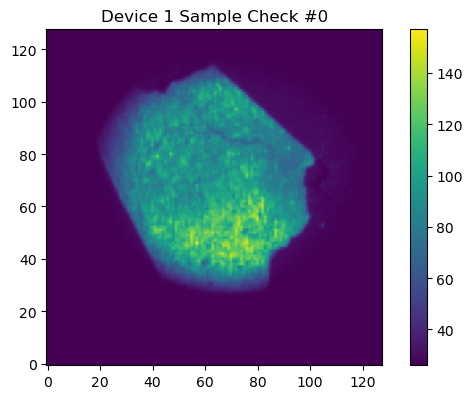

-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Exposure Value set to 0.3512760102748871
Exposure Auto set to 0


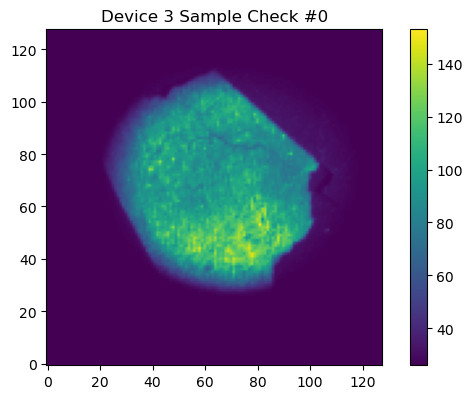

-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Exposure Value set to 0.03284100070595741
Exposure Auto set to 0


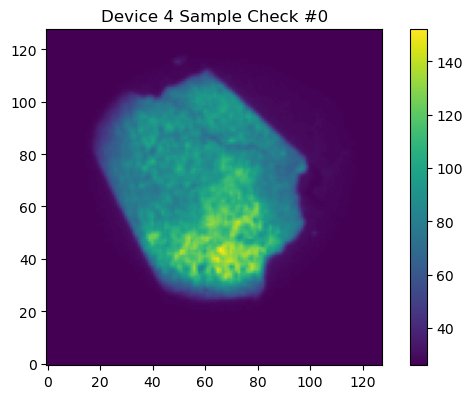

-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Exposure Value set to 0.177373006939888
Exposure Auto set to 0


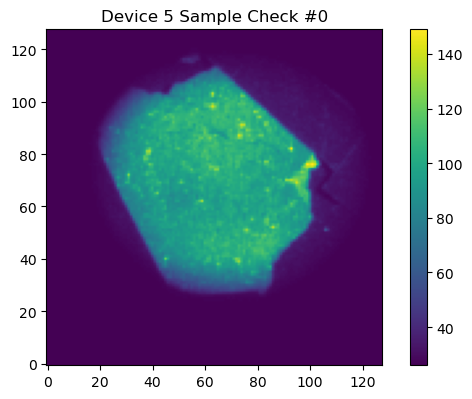

-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Exposure Value set to 0.7954009771347046
Exposure Auto set to 0


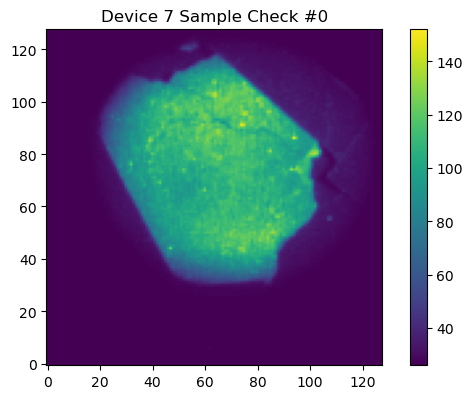

-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Exposure Value set to 0.014705000445246696
Exposure Auto set to 0


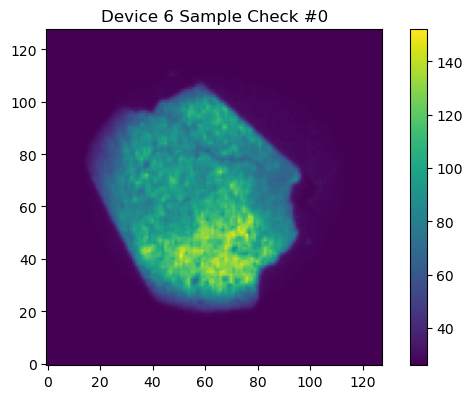

-----------------------------------


In [14]:
osc.capture_channel_images(
    cameras, 
    sample_exposures, 
    subject='Sample Check', 
    roi=True, 
    show_img=True)

Capture 10 repeat images of the sample in each channel.

In [15]:
osc.capture_channel_images(
    cameras, 
    sample_exposures, 
    subject='sample_1', 
    repeats=10,
    roi=False, 
    show_img=False,
    save_img=True)

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.057597000151872635
Exposure Auto set to 0
Exposure current Value: 0.057597000151872635
Image 0 written to ..\data\sample_1\0_650\650_0_img.tif
Exposure current Value: 0.057597000151872635
Image 1 written to ..\data\sample_1\0_650\650_1_img.tif
Exposure current Value: 0.057597000151872635
Image 2 written to ..\data\sample_1\0_650\650_2_img.tif
Exposure current Value: 0.057597000151872635
Image 3 written to ..\data\sample_1\0_650\650_3_img.tif
Exposure current Value: 0.057597000151872635
Image 4 written to ..\data\sample_1\0_650\650_4_img.tif
Exposure current Value: 0.057597000151872635
Image 5 written to ..\data\sample_1\0_650\650_5_img.tif
Exposure current Value: 0.057597000151872635
Image 6 written to ..\data\sample_1\0_650\650_6_img.tif
Exposure current Value: 0.057597000151872635
Image 7 written to ..\data\sample_1\0_650\650_7_img.tif
Exposure current Value: 0.057597000151872635


Write the exposures to file.

In [16]:
osc.record_exposures(cameras, sample_exposures, 'sample_1')

## Sample 2

In [19]:
sample_exposures = osc.find_channel_exposures(cameras, roi=True, n_hot=1, limit=10)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Quantile: 40.0, Target: 150
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.007500000298023224
Exposure set to 0.007499999832361937 (err of 5.238689482212067e-10
Trial 1:
Quantile: 78.0, Target: 150
Exposure current Value: 0.007499999832361937
Exposure Value set to 0.014423076994717121
Exposure set to 0.014422999694943428 (err of 7.69057526047584e-08
Trial 2:
Quantile: 126.0, Target: 150
Exposure current Value: 0.014422999694943428
Exposure Value set to 0.017170237377285957
Exposure set to 0.017170000821352005 (err of 2.369107235042356e-07
Trial 3:
Quantile: 145.0, Target: 150
Exposure current Value: 0.017170000821352005
Exposure Value set to 0.017762070521712303
Exposure set to 0.017761999741196632 (err of 7.007399509956214e-08
Trial 4:
Quantile: 151.0, Target: 150
Success after 4 trials
Ex

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.017761999741196632
Exposure Auto set to 0


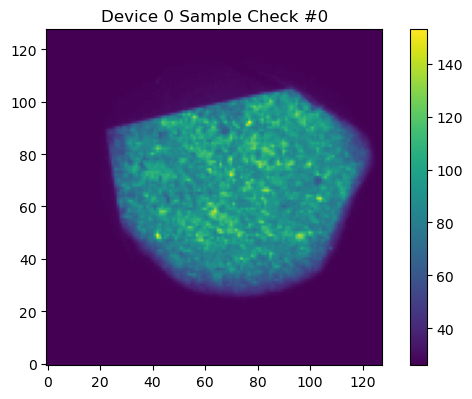

-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Exposure Value set to 0.027946999296545982
Exposure Auto set to 0


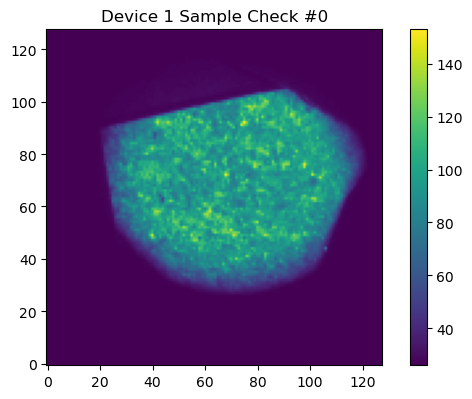

-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Exposure Value set to 0.1408279985189438
Exposure Auto set to 0


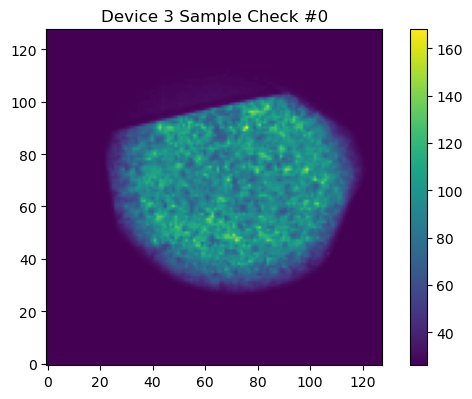

-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Exposure Value set to 0.016224000602960587
Exposure Auto set to 0


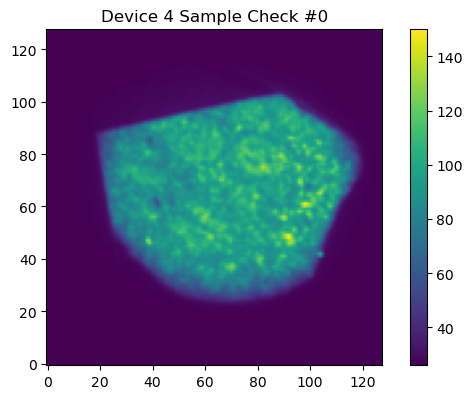

-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Exposure Value set to 0.04898399859666824
Exposure Auto set to 0


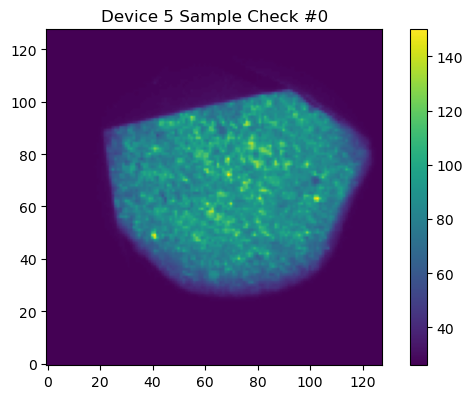

-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Exposure Value set to 0.2503960132598877
Exposure Auto set to 0


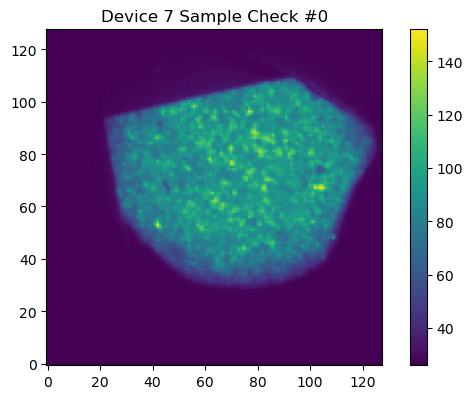

-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Exposure Value set to 0.008256999775767326
Exposure Auto set to 0


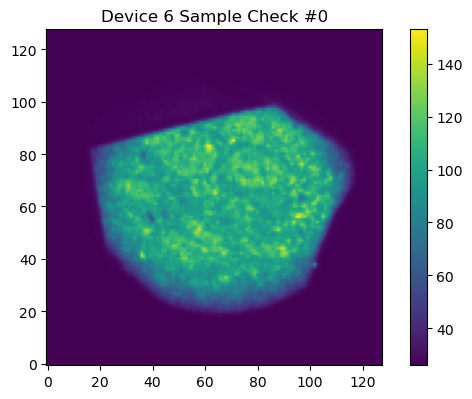

-----------------------------------


In [20]:
osc.capture_channel_images(
    cameras, 
    sample_exposures, 
    subject='Sample Check', 
    roi=True, 
    show_img=True)

In [32]:
osc.capture_channel_images(
    cameras, 
    sample_exposures, 
    subject='sample_2', 
    repeats=10,
    roi=False, 
    show_img=False,
    save_img=True)

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.05572900176048279
Exposure Auto set to 0
Exposure current Value: 0.05572900176048279
Image 0 written to ..\data\sample_2\0_650\650_0_img.tif
Exposure current Value: 0.05572900176048279
Image 1 written to ..\data\sample_2\0_650\650_1_img.tif
Exposure current Value: 0.05572900176048279
Image 2 written to ..\data\sample_2\0_650\650_2_img.tif
Exposure current Value: 0.05572900176048279
Image 3 written to ..\data\sample_2\0_650\650_3_img.tif
Exposure current Value: 0.05572900176048279
Image 4 written to ..\data\sample_2\0_650\650_4_img.tif
Exposure current Value: 0.05572900176048279
Image 5 written to ..\data\sample_2\0_650\650_5_img.tif
Exposure current Value: 0.05572900176048279
Image 6 written to ..\data\sample_2\0_650\650_6_img.tif
Exposure current Value: 0.05572900176048279
Image 7 written to ..\data\sample_2\0_650\650_7_img.tif
Exposure current Value: 0.05572900176048279
Image 8 wr

In [21]:
osc.record_exposures(cameras, sample_exposures, 'sample_2')

## Sample 3

In [24]:
sample_exposures = osc.find_channel_exposures(cameras, roi=True, n_hot =1, limit=10)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Quantile: 38.0, Target: 150
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.007894737645983696
Exposure set to 0.0078940000385046 (err of 7.371785805416337e-07
Trial 1:
Quantile: 77.0, Target: 150
Exposure current Value: 0.0078940000385046
Exposure Value set to 0.015377921983599663
Exposure set to 0.015376999974250793 (err of 9.221786802463688e-07
Trial 2:
Quantile: 130.0, Target: 150
Exposure current Value: 0.015376999974250793
Exposure Value set to 0.017742691561579704
Exposure set to 0.01774200052022934 (err of 6.91757752344091e-07
Trial 3:
Quantile: 145.0, Target: 150
Exposure current Value: 0.01774200052022934
Exposure Value set to 0.018353793770074844
Exposure set to 0.018353000283241272 (err of 7.933583752867124e-07
Trial 4:
Quantile: 150.0, Target: 150
Success after 4 trials
Exposure

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.018353000283241272
Exposure Auto set to 0


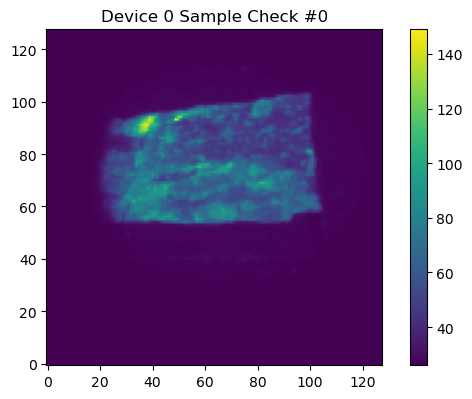

-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Exposure Value set to 0.028790999203920364
Exposure Auto set to 0


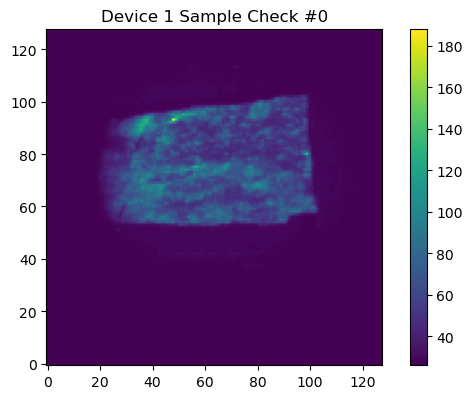

-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Exposure Value set to 0.20141400396823883
Exposure Auto set to 0


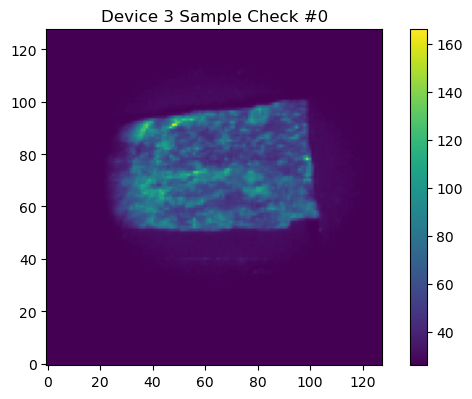

-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Exposure Value set to 0.01809299923479557
Exposure Auto set to 0


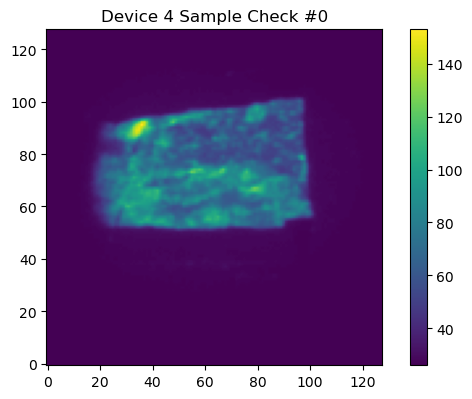

-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Exposure Value set to 0.07347100228071213
Exposure Auto set to 0


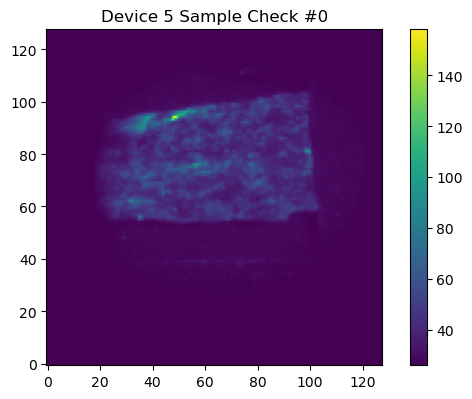

-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Exposure Value set to 0.5350919961929321
Exposure Auto set to 0


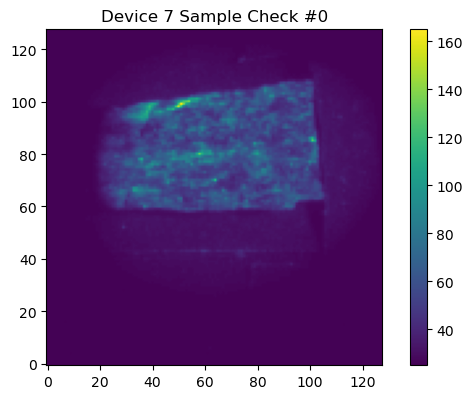

-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Exposure Value set to 0.00837900023907423
Exposure Auto set to 0


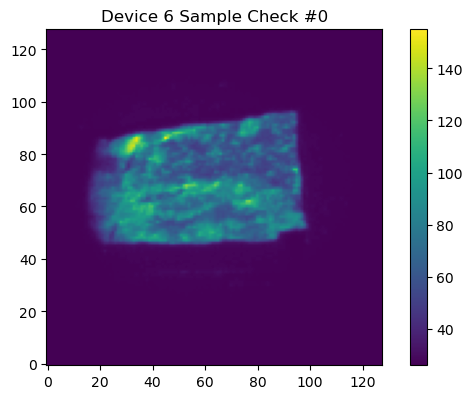

-----------------------------------


In [25]:
osc.capture_channel_images(
    cameras, 
    sample_exposures, 
    subject='Sample Check', 
    roi=True, 
    show_img=True)

In [26]:
osc.capture_channel_images(
    cameras, 
    sample_exposures, 
    subject='sample_3', 
    repeats=10,
    roi=False, 
    show_img=False,
    save_img=True)

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.018353000283241272
Exposure Auto set to 0
Exposure current Value: 0.018353000283241272
Image 0 written to ..\data\sample_3\0_650\650_0_img.tif
Exposure current Value: 0.018353000283241272
Image 1 written to ..\data\sample_3\0_650\650_1_img.tif
Exposure current Value: 0.018353000283241272
Image 2 written to ..\data\sample_3\0_650\650_2_img.tif
Exposure current Value: 0.018353000283241272
Image 3 written to ..\data\sample_3\0_650\650_3_img.tif
Exposure current Value: 0.018353000283241272
Image 4 written to ..\data\sample_3\0_650\650_4_img.tif
Exposure current Value: 0.018353000283241272
Image 5 written to ..\data\sample_3\0_650\650_5_img.tif
Exposure current Value: 0.018353000283241272
Image 6 written to ..\data\sample_3\0_650\650_6_img.tif
Exposure current Value: 0.018353000283241272
Image 7 written to ..\data\sample_3\0_650\650_7_img.tif
Exposure current Value: 0.018353000283241272


In [27]:
osc.record_exposures(cameras, sample_exposures, 'sample_3')

## Sample 4

In [17]:
sample_exposures = osc.find_channel_exposures(cameras, roi=True, limit=10, init_t_exp=1.0/11)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.09090909361839294
Trial 0:
Quantile: 111.0, Target: 150
Exposure current Value: 0.09090899676084518
Exposure Value set to 0.12284999340772629
Exposure set to 0.1228490024805069 (err of 9.93142256863755e-07
Trial 1:
Quantile: 141.0, Target: 150
Exposure current Value: 0.1228490024805069
Exposure Value set to 0.13069042563438416
Exposure set to 0.13068999350070953 (err of 4.3467004248731733e-07
Trial 2:
Quantile: 149.0, Target: 150
Success after 2 trials
Exposure current Value: 0.13068999350070953
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.09090909361839294
Trial 0:
Quantile: 89.0, Target: 150
Exposure current Value: 0.09090899676084518
Exposure Value set to 0.1532174050807953
Exposure set to 0.15321700274

UnboundLocalError: local variable 't_exp_scale' referenced before assignment

In [13]:
sample_exposures

{'DMK 33GX249 10910288': 0.0927639976143837,
 'DMK 33GX249 10910273': 0.13241800665855408,
 'DMK 33GX249 10910294': 50.0,
 'DMK 33GX249 10910291': 0.06631100177764893,
 'DMK 33GX249 10910295': 0.21833500266075134,
 'DMK 33GX249 23120778': 0.8446589708328247,
 'DMK 33GX249 10910265': 0.03231099992990494}

In [14]:
sample_exposures['DMK 33GX249 10910294'] = 0.08333

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.0927639976143837
Exposure Auto set to 0


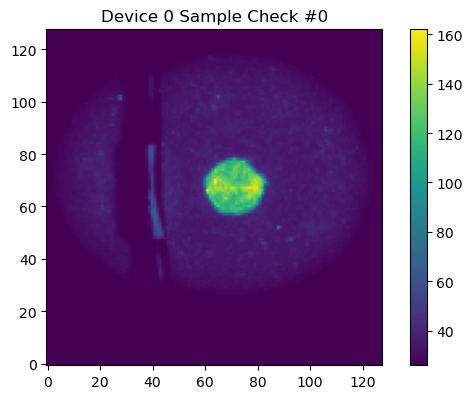

-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Exposure Value set to 0.13241800665855408
Exposure Auto set to 0


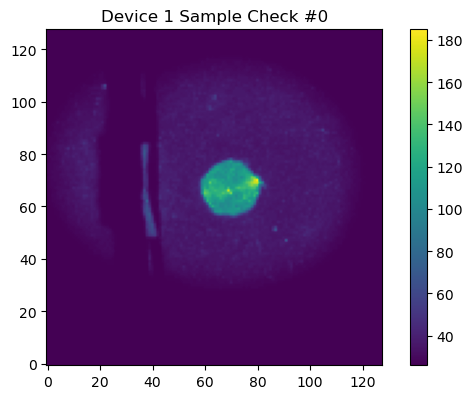

-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Exposure Value set to 0.08332999795675278
Exposure Auto set to 0


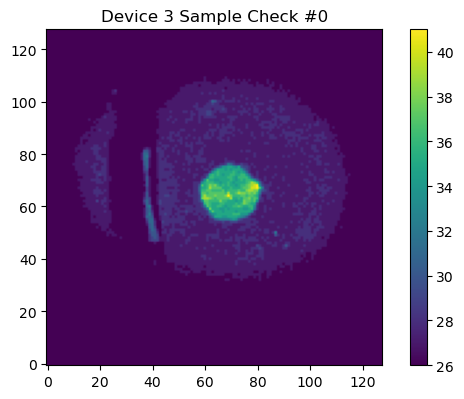

-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Exposure Value set to 0.06631100177764893
Exposure Auto set to 0
No image recieved in 5000 ms


TypeError: Image data of dtype object cannot be converted to float

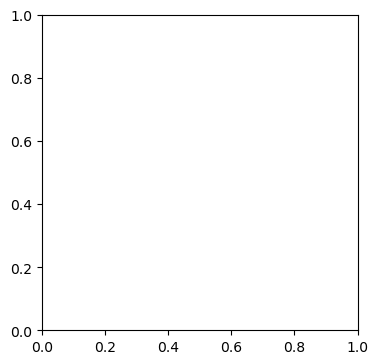

In [16]:
osc.capture_channel_images(
    cameras, 
    sample_exposures, 
    subject='Sample Check', 
    roi=True, 
    show_img=True)

In [15]:
osc.capture_channel_images(
    cameras, 
    sample_exposures, 
    subject='sample_4', 
    repeats=10,
    roi=False, 
    show_img=False,
    save_img=True)

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.0927639976143837
Exposure Auto set to 0
Exposure current Value: 0.09276299923658371
Image 0 written to ..\data\sample_4\0_650\650_0_img.tif
Exposure current Value: 0.09276299923658371
Image 1 written to ..\data\sample_4\0_650\650_1_img.tif
Exposure current Value: 0.09276299923658371
Image 2 written to ..\data\sample_4\0_650\650_2_img.tif
Exposure current Value: 0.09276299923658371
Image 3 written to ..\data\sample_4\0_650\650_3_img.tif
Exposure current Value: 0.09276299923658371
Image 4 written to ..\data\sample_4\0_650\650_4_img.tif
Exposure current Value: 0.09276299923658371
Image 5 written to ..\data\sample_4\0_650\650_5_img.tif
Exposure current Value: 0.09276299923658371
Image 6 written to ..\data\sample_4\0_650\650_6_img.tif
Exposure current Value: 0.09276299923658371
Image 7 written to ..\data\sample_4\0_650\650_7_img.tif
Exposure current Value: 0.09276299923658371
Image 8 wri

TypeError: 'NoneType' object is not iterable

In [ ]:
osc.record_exposures(cameras, sample_exposures, 'sample_4')

# Dark Frame Imaging

Now we use the recorded exposures to capture dark frames.

Check:
1. Lens cap is in place

In [ ]:
osc.prepare_dark_acquisition(ic)

Capture Reflectance Calibration Dark Frames.

Load calibration target exposures

In [3]:
calibration_exposures = osc.load_exposures(cameras, 'reflectance_calibration')

In [4]:
osc.capture_channel_images(
    cameras, 
    calibration_exposures, 
    subject='reflectance_calibration', 
    img_type='drk',
    repeats=10,
    roi=False, 
    show_img=False,
    save_img=True)

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.006812999956309795
Exposure Auto set to 0
Exposure current Value: 0.006812000181525946
Image 0 written to ..\data\reflectance_calibration\0_650\650_0_drk.tif
Exposure current Value: 0.006812000181525946
Image 1 written to ..\data\reflectance_calibration\0_650\650_1_drk.tif
Exposure current Value: 0.006812000181525946
Image 2 written to ..\data\reflectance_calibration\0_650\650_2_drk.tif
Exposure current Value: 0.006812000181525946
Image 3 written to ..\data\reflectance_calibration\0_650\650_3_drk.tif
Exposure current Value: 0.006812000181525946
Image 4 written to ..\data\reflectance_calibration\0_650\650_4_drk.tif
Exposure current Value: 0.006812000181525946
Image 5 written to ..\data\reflectance_calibration\0_650\650_5_drk.tif
Exposure current Value: 0.006812000181525946
Image 6 written to ..\data\reflectance_calibration\0_650\650_6_drk.tif
Exposure current Value: 0.006812000181525

Capture Geometric Calibration Dark Frames.

In [5]:
geometric_exposures = osc.load_exposures(cameras, 'geometric_calibration')

In [6]:
osc.capture_channel_images(
    cameras, 
    geometric_exposures, 
    subject='geometric_calibration', 
    img_type='drk',
    repeats=10,
    roi=False, 
    show_img=False,
    save_img=True)

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.009500999934971333
Exposure Auto set to 0
Exposure current Value: 0.009499999694526196
Image 0 written to ..\data\geometric_calibration\0_650\650_0_drk.tif
Exposure current Value: 0.009499999694526196
Image 1 written to ..\data\geometric_calibration\0_650\650_1_drk.tif
Exposure current Value: 0.009499999694526196
Image 2 written to ..\data\geometric_calibration\0_650\650_2_drk.tif
Exposure current Value: 0.009499999694526196
Image 3 written to ..\data\geometric_calibration\0_650\650_3_drk.tif
Exposure current Value: 0.009499999694526196
Image 4 written to ..\data\geometric_calibration\0_650\650_4_drk.tif
Exposure current Value: 0.009499999694526196
Image 5 written to ..\data\geometric_calibration\0_650\650_5_drk.tif
Exposure current Value: 0.009499999694526196
Image 6 written to ..\data\geometric_calibration\0_650\650_6_drk.tif
Exposure current Value: 0.009499999694526196
Image 7 wr

Capture Sample Dark Frames.

In [7]:
sample_exposures = osc.load_exposures(cameras, 'sample_1')

In [8]:
osc.capture_channel_images(
    cameras, 
    sample_exposures, 
    subject='sample_1', 
    img_type='drk',
    repeats=10,
    roi=False, 
    show_img=False,
    save_img=True)

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.057597000151872635
Exposure Auto set to 0
Exposure current Value: 0.057597000151872635
Image 0 written to ..\data\sample_1\0_650\650_0_drk.tif
Exposure current Value: 0.057597000151872635
Image 1 written to ..\data\sample_1\0_650\650_1_drk.tif
Exposure current Value: 0.057597000151872635
Image 2 written to ..\data\sample_1\0_650\650_2_drk.tif
Exposure current Value: 0.057597000151872635
Image 3 written to ..\data\sample_1\0_650\650_3_drk.tif
Exposure current Value: 0.057597000151872635
Image 4 written to ..\data\sample_1\0_650\650_4_drk.tif
Exposure current Value: 0.057597000151872635
Image 5 written to ..\data\sample_1\0_650\650_5_drk.tif
Exposure current Value: 0.057597000151872635
Image 6 written to ..\data\sample_1\0_650\650_6_drk.tif
Exposure current Value: 0.057597000151872635
Image 7 written to ..\data\sample_1\0_650\650_7_drk.tif
Exposure current Value: 0.057597000151872635


In [9]:
sample_exposures = osc.load_exposures(cameras, 'sample_2')

In [10]:
osc.capture_channel_images(
    cameras, 
    sample_exposures, 
    subject='sample_2', 
    img_type='drk',
    repeats=10,
    roi=False, 
    show_img=False,
    save_img=True)

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.017761999741196632
Exposure Auto set to 0
Exposure current Value: 0.017760999500751495
Image 0 written to ..\data\sample_2\0_650\650_0_drk.tif
Exposure current Value: 0.017760999500751495
Image 1 written to ..\data\sample_2\0_650\650_1_drk.tif
Exposure current Value: 0.017760999500751495
Image 2 written to ..\data\sample_2\0_650\650_2_drk.tif
Exposure current Value: 0.017760999500751495
Image 3 written to ..\data\sample_2\0_650\650_3_drk.tif
Exposure current Value: 0.017760999500751495
Image 4 written to ..\data\sample_2\0_650\650_4_drk.tif
Exposure current Value: 0.017760999500751495
Image 5 written to ..\data\sample_2\0_650\650_5_drk.tif
Exposure current Value: 0.017760999500751495
Image 6 written to ..\data\sample_2\0_650\650_6_drk.tif
Exposure current Value: 0.017760999500751495
Image 7 written to ..\data\sample_2\0_650\650_7_drk.tif
Exposure current Value: 0.017760999500751495


In [11]:
sample_exposures = osc.load_exposures(cameras, 'sample_3')

In [12]:
osc.capture_channel_images(
    cameras, 
    sample_exposures, 
    subject='sample_3', 
    img_type='drk',
    repeats=10,
    roi=False, 
    show_img=False,
    save_img=True)

-----------------------------------
Device 0
-----------------------------------
Exposure Value set to 0.018353000283241272
Exposure Auto set to 0
Exposure current Value: 0.018353000283241272
Image 0 written to ..\data\sample_3\0_650\650_0_drk.tif
Exposure current Value: 0.018353000283241272
Image 1 written to ..\data\sample_3\0_650\650_1_drk.tif
Exposure current Value: 0.018353000283241272
Image 2 written to ..\data\sample_3\0_650\650_2_drk.tif
Exposure current Value: 0.018353000283241272
Image 3 written to ..\data\sample_3\0_650\650_3_drk.tif
Exposure current Value: 0.018353000283241272
Image 4 written to ..\data\sample_3\0_650\650_4_drk.tif
Exposure current Value: 0.018353000283241272
Image 5 written to ..\data\sample_3\0_650\650_5_drk.tif
Exposure current Value: 0.018353000283241272
Image 6 written to ..\data\sample_3\0_650\650_6_drk.tif
Exposure current Value: 0.018353000283241272
Image 7 written to ..\data\sample_3\0_650\650_7_drk.tif
Exposure current Value: 0.018353000283241272


In [16]:
sample_exposures = osc.load_exposures(cameras, 'sample_4')

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\sample_4\\0_650\\exposure_seconds.txt'

In [ ]:
osc.capture_channel_images(
    cameras, 
    sample_exposures, 
    subject='sample_4', 
    img_type='drk',
    repeats=10,
    roi=False, 
    show_img=False,
    save_img=True)